# 梯度下降优化算法--momentum梯度张量法、adam算法

 ## 1.指数衰减学习率
*tf.train.exponential_decay(learning_rate,global_step,decay_steps,decay_rate,staircase=False,name=None);<br>
*指数衰减学习率：new_learningrate=learningrate*(decay_rate^(global_step/decay_step));<br>
*learning_rate 参数为初始的学习率;<br>
*global_step 参数为当前的训练步数;<br>
*decay_steps参数设置了学习率衰减的速度，经过 decay_steps 后会进行一次衰减;<br>
*decay_rate 参数则是衰减的比例;<br>
*staircse 参数为真时会对 global_step/decay_step进行取整，从而学习率会呈阶梯式下降.<br>

## 2. tf.get_collection的使用方法
该函数共有两个参数，分别是key和scope；该函数的作用是从一个collection中取出全部变量，形成列个列表，key参数中输入的是collection的名称。该函数常常与tf.get_variable和tf.add_to_collection配合使用。

* 关于tf.GraphKeys.UPDATE_OPS:<br>
这是一个tensorflow的计算图中内置的一个集合，其中会保存一些需要在训练操作之前完成的操作，并配合tf.control_dependencies函数使用。

## 3.scipy.optimize.minimize()函数
* scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)<br>
fun: 求最小值的目标函数<br>
x0:变量的初始猜测值，如果有多个变量，需要给每个变量一个初始猜测值。minimize是局部最优的解法，所以args:常数值,后面demo会讲解，fun中没有数字，都以变量的形式表示，对于常数项，需要在这里给值.<br>
method:求极值的方法，官方文档给了很多种。一般使用默认。每种方法我理解是计算误差，反向传播的方式不同而已，这块有很大理论研究空间<br>
constraints:约束条件，针对fun中为参数的部分进行约束限制

## 4.tf.summary.scalar()和tf.summary.histogram()
* tf.summary.scalar(tags, values, collections=None, name=None)用来显示标量信息,  一般在画loss,accuary时会用到这个函数。<br>
*  tf.summary.histogram(tags, values, collections=None, name=None)  用来显示直方图信息,一般用来显示训练过程中变量的分布情况.<br>
* tf.name_scope()：为Graph中的Tensor添加层级，TensorBoard会按照代码指定的层级进行展示，初始状态下只绘制最高层级的效果，点击后可展开层级看到下一层的细节。<br>
*   tf.summary.merge_all()：添加一个操作，代表执行所有summary操作，这样可以避免人工执行每一个summary op。

## 5.优化算法的优缺点比较
### （1）momentum
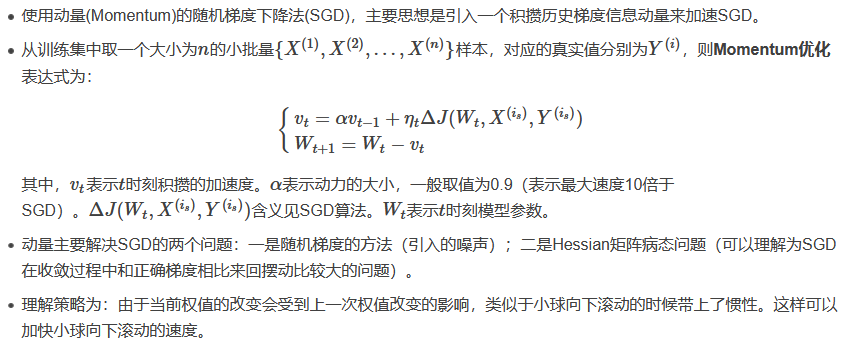
### （2）adam
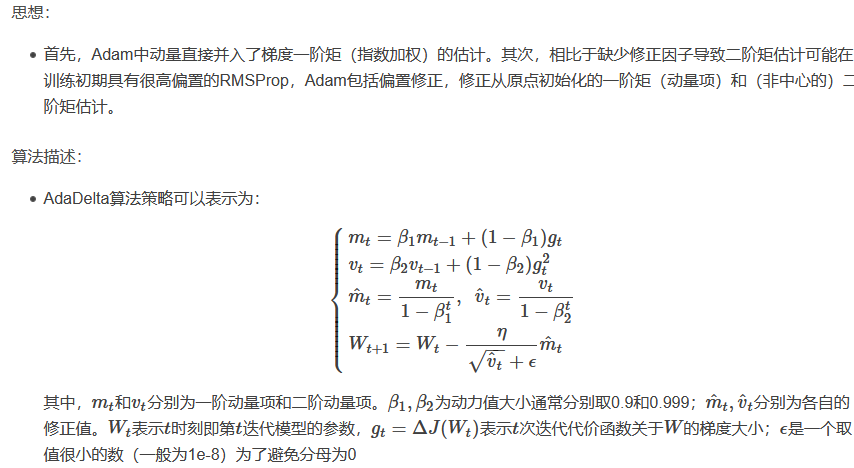


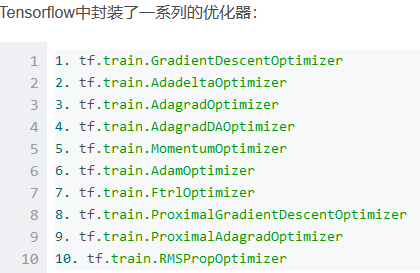

In [ ]:
def add_training_op(self):
    if self.optimizer == "momentum":
      self.learning_rate_node = tf.compat.v1.train.exponential_decay(learning_rate=self.learning_rate,
                                 global_step=self.global_step,
                                 decay_steps=self.decay_step,
                                 decay_rate=self.decay_rate,
                                 staircase=True)
      optimizer = tf.compat.v1.train.MomentumOptimizer(learning_rate=self.learning_rate_node,
                           momentum=self.momentum)
    elif self.optimizer == "adam":
      self.learning_rate_node = tf.compat.v1.train.exponential_decay(learning_rate=self.learning_rate,
                                 global_step=self.global_step,
                                 decay_steps=self.decay_step,
                                 decay_rate=self.decay_rate,
                                 staircase=True)

      optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=self.learning_rate_node)
    update_ops = tf.compat.v1.get_collection(tf.compat.v1.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
      self.train_op = optimizer.minimize(self.loss, global_step=self.global_step)
    tmp = tf.compat.v1.summary.scalar("learning_rate", self.learning_rate_node)
    self.summary_train.append(tmp)